# Results of the online phase

This notebook reports some python code to generate useful results.

In this tutorial we are going to analyse the output of each online solver, in particular the structure is the following:
- **Comparison of the reconstruction error for scalar fields** for different algorithms (POD, EIM, GEIM and PBDW) using clean data;
- **Comparison of the reconstruction error for vector fields** for different algorithms (POD and EIM) using clean data;
- **Impact of the sensors variance to the interpolant of GEIM** using clean data;
- **Sensitivity of GEIM to noisy data**;
- **Sensitivity of PBDW to noisy data**;
- **Regularisation via TR-GEIM for noisy data**;
- **Indirect Reconstruction with GEIM-VT**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

var_names = ['T', 'U']
tex_var_names = ['T', '\mathbf{u}']

## Comparison of the reconstruction error
In this section, we are going to plot the average absolute and relative error between the reconstruction/interpolant and the true fields of the Test set, defined as follows for the generic field $\psi$ (either scalar or vector)
\begin{equation*}
E_M = \left\langle\left\| \psi(\boldsymbol{\mu}) - \mathcal{I}_M[\psi(\boldsymbol{\mu})]\right\|_{L^2}\right\rangle_{\boldsymbol{\mu}\in\Xi_{\text{test}}} \qquad \qquad
\varepsilon_M = \left\langle \frac{\left\| \psi(\boldsymbol{\mu}) - \mathcal{I}_M[\psi(\boldsymbol{\mu})]\right\|_{L^2}}{\left\| \psi(\boldsymbol{\mu}) \right\|_{L^2}}\right\rangle_{\boldsymbol{\mu}\in\Xi_{\text{test}}} 
\end{equation*}
given $\mathcal{I}_M$ the reconstruction operator using $M$ basis functions.

### Scalar Field: clean data
Let us first consider the case of the temperature field $T$ for the following algorithm: POD, EIM, GEIM (only $s^2=0.0004$) and PBDW (only $s^2=0.0004$).

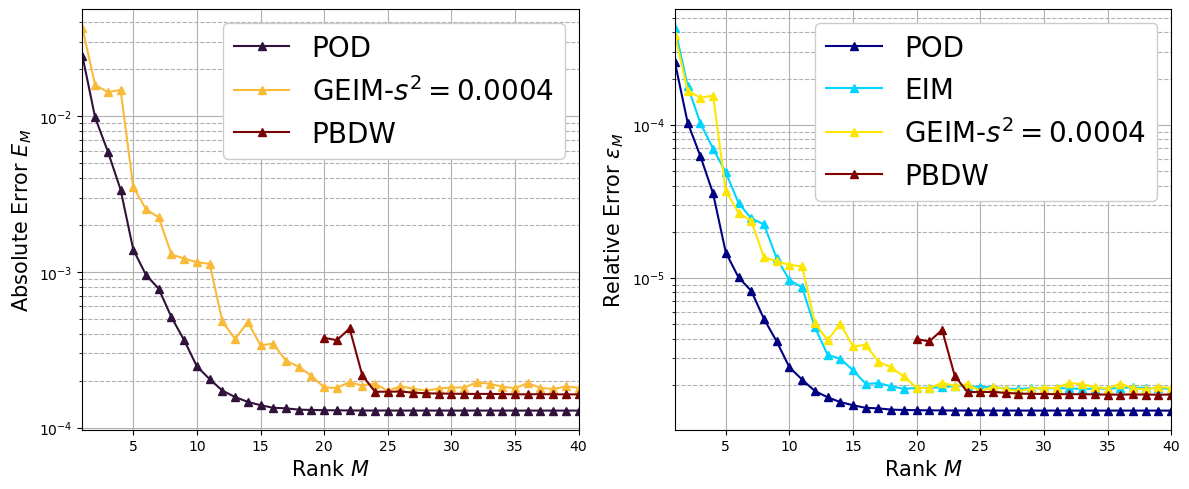

In [2]:
clean_scalar_AbsErr = dict()
clean_scalar_RelErr = dict()

field = 'T'
s2 = '0.0004'

# Importing data
clean_scalar_AbsErr['POD']  = np.loadtxt('./POD_'+field+'/'+field+'_reconstruction_POD_files/average_L2_absolute_error.txt')
clean_scalar_RelErr['POD']  = np.loadtxt('./POD_'+field+'/'+field+'_reconstruction_POD_files/average_L2_relative_error.txt')

# clean_scalar_AbsErr['EIM'] = np.loadtxt('./EIM_'+field+'_EIM_Online_files/average_L2_absolute_error.txt')[1:]
clean_scalar_RelErr['EIM'] = np.loadtxt('./EIM_'+field+'/'+field+'_EIM_Online_files/average_L2_relative_error.txt')[1:]

clean_scalar_AbsErr['GEIM'] = np.loadtxt('./CleanData/GEIM_'+field+'_s_'+s2+'/'+field+'_GEIM_Online_files/average_L2_absolute_error.txt')
clean_scalar_RelErr['GEIM'] = np.loadtxt('./CleanData/GEIM_'+field+'_s_'+s2+'/'+field+'_GEIM_Online_files/average_L2_relative_error.txt')

clean_scalar_AbsErr['PBDW'] = np.loadtxt('./CleanData/PBDW_'+field+'_WeakGreedy_s_'+s2+'/'+field+'_PBDW_Online_files/average_L2_absolute_error.txt')
clean_scalar_RelErr['PBDW'] = np.loadtxt('./CleanData/PBDW_'+field+'_WeakGreedy_s_'+s2+'/'+field+'_PBDW_Online_files/average_L2_relative_error.txt')

ScalarTestErr_fig = plt.figure( figsize= (12,5))

color = iter(cm.turbo(np.linspace(0, 1, 4)))
plt.subplot(1,2,1)
c = next(color)
plt.semilogy(np.arange(1,clean_scalar_AbsErr['POD'].size+1,1),
         clean_scalar_AbsErr['POD'], '-^', c=c, label=r"POD")
c = next(color)
# plt.plot(np.arange(1,clean_scalar_AbsErr['EIM'].size+1,1),
#          clean_scalar_AbsErr['EIM'], '-^', c=c, label=r"EIM")
c = next(color)
plt.plot(np.arange(1,clean_scalar_AbsErr['GEIM'].size+1,1),
         clean_scalar_AbsErr['GEIM'], '-^', c=c, label=r"GEIM-$s^2=0.0004$")
c = next(color)
plt.plot(np.arange(20,clean_scalar_AbsErr['PBDW'].size+20,1),
         clean_scalar_AbsErr['PBDW'], '-^', c=c, label=r"PBDW")
         
plt.xlabel(r"Rank $M$",fontsize=15)
plt.xticks(np.arange(0,clean_scalar_AbsErr['POD'].size+1,5))
plt.xlim(1,clean_scalar_AbsErr['POD'].size)
plt.ylabel(r"Absolute Error $E_M$",fontsize=15)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle='--')
plt.legend(fontsize=20, framealpha=1., loc = 'upper right')


color = iter(cm.jet(np.linspace(0, 1, 4)))
plt.subplot(1,2,2)
c = next(color)
plt.semilogy(np.arange(1,clean_scalar_RelErr['POD'].size+1,1),
         clean_scalar_RelErr['POD'], '-^', c=c, label=r"POD")
c = next(color)
plt.plot(np.arange(1,clean_scalar_RelErr['EIM'].size+1,1),
         clean_scalar_RelErr['EIM'], '-^', c=c, label=r"EIM")
c = next(color)
plt.plot(np.arange(1,clean_scalar_RelErr['GEIM'].size+1,1),
         clean_scalar_RelErr['GEIM'], '-^', c=c, label=r"GEIM-$s^2=0.0004$")
c = next(color)
plt.plot(np.arange(20,clean_scalar_RelErr['PBDW'].size+20,1),
         clean_scalar_RelErr['PBDW'], '-^', c=c, label=r"PBDW")
         
plt.xlabel(r"Rank $M$",fontsize=15)
plt.xticks(np.arange(0,clean_scalar_RelErr['POD'].size+1,5))
plt.xlim(1,clean_scalar_RelErr['POD'].size)
plt.ylabel(r"Relative Error $\varepsilon_M$",fontsize=15)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle='--')
plt.legend(fontsize=20, framealpha=1., loc = 'upper right')

plt.tight_layout()
# ScalarTestErr_fig.savefig('scalar_test_error_clean.pdf', format='pdf', dpi=300, bbox_inches='tight')

### Vector Field: clean data
Let us first consider the case of the velocity field $\mathbf{u}$ for the following algorithm: POD and EIM.
Only the relative error is calculated.

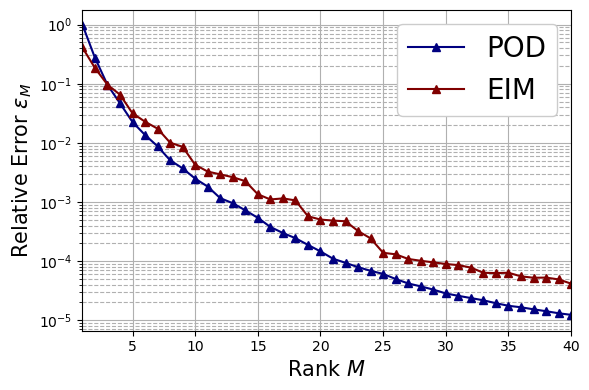

In [3]:
clean_vector_AbsErr = dict()
clean_vector_RelErr = dict()

field = 'U'

# Importing data
# clean_vector_AbsErr['POD']  = np.loadtxt('./POD_'+field+'/'+field+'_reconstruction_POD_files/average_L2_absolute_error.txt')
clean_vector_RelErr['POD']  = np.loadtxt('./POD_'+field+'/'+field+'_reconstruction_POD_files/average_L2_relative_error.txt')

# clean_vector_AbsErr['EIM'] = np.loadtxt('./EIM_'+field+'_EIM_Online_files/average_L2_absolute_error.txt')[1:]
clean_vector_RelErr['EIM'] = np.loadtxt('./EIM_'+field+'/'+field+'_EIM_Online_files/average_L2_relative_error.txt')[1:]


VectorTestErr_fig = plt.figure( figsize= (6,4))

color = iter(cm.jet(np.linspace(0, 1, 2)))
c = next(color)
plt.semilogy(np.arange(1,clean_vector_RelErr['POD'].size+1,1),
         clean_vector_RelErr['POD'], '-^', c=c, label=r"POD")
c = next(color)
plt.plot(np.arange(1,clean_vector_RelErr['EIM'].size+1,1),
         clean_vector_RelErr['EIM'], '-^', c=c, label=r"EIM")
         
plt.xlabel(r"Rank $M$",fontsize=15)
plt.xticks(np.arange(0,clean_scalar_RelErr['POD'].size+1,5))
plt.xlim(1,clean_scalar_RelErr['POD'].size)
plt.ylabel(r"Relative Error $\varepsilon_M$",fontsize=15)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle='--')
plt.legend(fontsize=20, framealpha=1., loc = 'upper right')

plt.tight_layout()
# VectorTestErr_fig.savefig('vector_test_error_clean.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Impact of the sensors variance to the interpolant of GEIM
In this section, we are going to plot the average absolute and relative error between the interpolant of GEIM with clean data using different sensors (i.e., different values for $s^2$) and the true fields of the Test set, defined as follows for the generic field $\psi$ (either scalar or vector)
\begin{equation*}
E_M = \left\langle\left\| \psi(\boldsymbol{\mu}) - \mathcal{I}_M[\psi(\boldsymbol{\mu})]\right\|_{L^2}\right\rangle_{\boldsymbol{\mu}\in\Xi_{\text{test}}} \qquad \qquad
\varepsilon_M = \left\langle \frac{\left\| \psi(\boldsymbol{\mu}) - \mathcal{I}_M[\psi(\boldsymbol{\mu})]\right\|_{L^2}}{\left\| \psi(\boldsymbol{\mu}) \right\|_{L^2}}\right\rangle_{\boldsymbol{\mu}\in\Xi_{\text{test}}} 
\end{equation*}
given $\mathcal{I}_M$ the interpolant using $M$ basis functions.

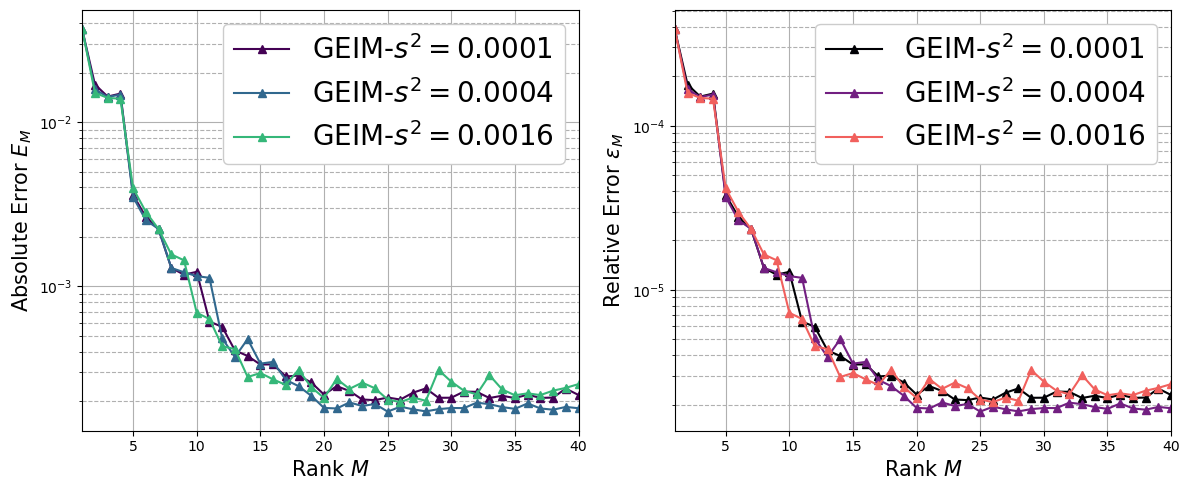

In [4]:
clean_GEIM_AbsErr = dict()
clean_GEIM_RelErr = dict()

field = 'T'
s2 = ['0.0001', '0.0004', '0.0016']

# Importing data
for ll in range(len(s2)):
    clean_GEIM_AbsErr['s2 = '+s2[ll]] = np.loadtxt('./CleanData/GEIM_'+field+'_s_'+s2[ll]+'/'+field+'_GEIM_Online_files/average_L2_absolute_error.txt')
    clean_GEIM_RelErr['s2 = '+s2[ll]] = np.loadtxt('./CleanData/GEIM_'+field+'_s_'+s2[ll]+'/'+field+'_GEIM_Online_files/average_L2_relative_error.txt')

cleanGEIMTestErr_fig = plt.figure( figsize= (12,5))

color = iter(cm.viridis(np.linspace(0, 1, len(s2)+1)))
plt.subplot(1,2,1)
for ll in range(len(s2)):
    c = next(color)
    plt.semilogy(np.arange(1,clean_GEIM_AbsErr['s2 = '+s2[ll]].size+1,1),
            clean_GEIM_AbsErr['s2 = '+s2[ll]], '-^', c=c, label=r"GEIM-$s^2= "+s2[ll]+"$")

plt.xlabel(r"Rank $M$",fontsize=15)
plt.xticks(np.arange(0,clean_GEIM_AbsErr['s2 = '+s2[ll]].size+1,5))
plt.xlim(1,clean_GEIM_AbsErr['s2 = '+s2[ll]].size)
plt.ylabel(r"Absolute Error $E_M$",fontsize=15)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle='--')
plt.legend(fontsize=20, framealpha=1., loc = 'upper right')


color = iter(cm.magma(np.linspace(0, 1, len(s2)+1)))
plt.subplot(1,2,2)
for ll in range(len(s2)):
    c = next(color)
    plt.semilogy(np.arange(1,clean_GEIM_RelErr['s2 = '+s2[ll]].size+1,1),
            clean_GEIM_RelErr['s2 = '+s2[ll]], '-^', c=c, label=r"GEIM-$s^2= "+s2[ll]+"$")
         
plt.xlabel(r"Rank $M$",fontsize=15)
plt.xticks(np.arange(0,clean_GEIM_RelErr['s2 = '+s2[ll]].size+1,5))
plt.xlim(1,clean_GEIM_RelErr['s2 = '+s2[ll]].size)
plt.ylabel(r"Relative Error $\varepsilon_M$",fontsize=15)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle='--')
plt.legend(fontsize=20, framealpha=1., loc = 'upper right')

plt.tight_layout()
# cleanGEIMTestErr_fig.savefig('GEIMclean_test_error.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Sensitivity of GEIM to noisy data
Let us now consider noisy data, meaning that the measurements $\mathbf{y}\in\mathbb{R}^M$ are represented as follows
\begin{equation*}
    y_m = v_m(u(\cdot;\,\boldsymbol{\mu})) + \epsilon_m
\end{equation*}
where $\epsilon_m$ models random noise as a random variable, i.i. with a zero-mean Gaussian distribution $\sim \mathcal{N}(0,\sigma^2)$. Three values of $\sigma$ will be considered (all with $s^2=0.0004$), namely
\begin{equation*}
\sigma = \{10^{-3},\,10^{-2},\,10^{-1}\}
\end{equation*}

The absolute and relative error defined as above will be plotted.

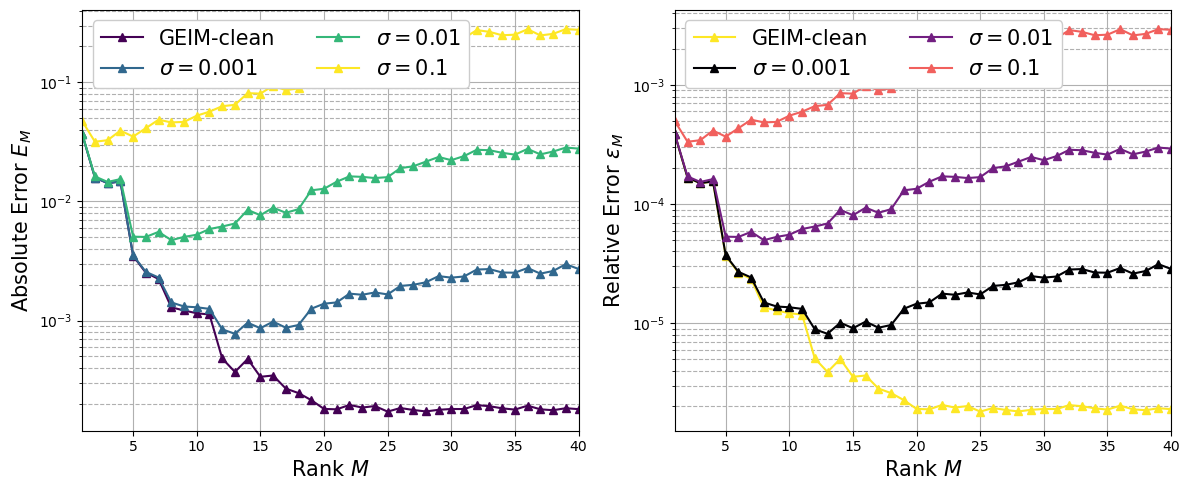

In [5]:
noisy_GEIM_AbsErr = dict()
noisy_GEIM_RelErr = dict()

field = 'T'
sigma = ['0.001', '0.01', '0.1']

# Importing data
for ll in range(len(sigma)):
    noisy_GEIM_AbsErr['sigma = '+sigma[ll]] = np.loadtxt('./NoisyData-noreg/GEIM_'+field+'_sigma_'+sigma[ll]+'/'+field+'_GEIM_Online_files/average_L2_absolute_error.txt')
    noisy_GEIM_RelErr['sigma = '+sigma[ll]] = np.loadtxt('./NoisyData-noreg/GEIM_'+field+'_sigma_'+sigma[ll]+'/'+field+'_GEIM_Online_files/average_L2_relative_error.txt')

noisyGEIMTestErr_fig = plt.figure( figsize= (12,5))

color = iter(cm.viridis(np.linspace(0, 1, len(sigma)+1)))
plt.subplot(1,2,1)
c = next(color)
plt.semilogy(np.arange(1,clean_GEIM_AbsErr['s2 = '+s2[1]].size+1,1),
        clean_GEIM_AbsErr['s2 = '+s2[1]], '-^', c=c, label=r"GEIM-clean")
for ll in range(len(sigma)):
    c = next(color)
    plt.semilogy(np.arange(1,noisy_GEIM_AbsErr['sigma = '+sigma[ll]].size+1,1),
            noisy_GEIM_AbsErr['sigma = '+sigma[ll]], '-^', c=c, label=r"$\sigma = "+sigma[ll]+"$")

plt.xlabel(r"Rank $M$",fontsize=15)
plt.xticks(np.arange(0,noisy_GEIM_AbsErr['sigma = '+sigma[ll]].size+1,5))
plt.xlim(1,noisy_GEIM_AbsErr['sigma = '+sigma[ll]].size)
plt.ylabel(r"Absolute Error $E_M$",fontsize=15)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle='--')
plt.legend(fontsize=15, framealpha=1., loc = 'upper left', ncols=2)


color = iter(cm.magma(np.linspace(0, 1, len(sigma)+1)))
plt.subplot(1,2,2)
plt.semilogy(np.arange(1,clean_GEIM_RelErr['s2 = '+s2[1]].size+1,1),
        clean_GEIM_RelErr['s2 = '+s2[1]], '-^', c=c, label=r"GEIM-clean")
for ll in range(len(sigma)):
    c = next(color)
    plt.semilogy(np.arange(1,noisy_GEIM_RelErr['sigma = '+sigma[ll]].size+1,1),
            noisy_GEIM_RelErr['sigma = '+sigma[ll]], '-^', c=c, label=r"$\sigma = "+sigma[ll]+"$")
         
plt.xlabel(r"Rank $M$",fontsize=15)
plt.xticks(np.arange(0,noisy_GEIM_RelErr['sigma = '+sigma[ll]].size+1,5))
plt.xlim(1,noisy_GEIM_RelErr['sigma = '+sigma[ll]].size)
plt.ylabel(r"Relative Error $\varepsilon_M$",fontsize=15)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle='--')
plt.legend(fontsize=15, framealpha=1., loc = 'upper left', ncols=2)

plt.tight_layout()
# noisyGEIMTestErr_fig.savefig('GEIMnoisy_test_error.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Sensitivity of PBDW to noisy data
Considering again noisy data, represented as before, the sensitivity to noise of PBDW will be investigated. Three values of $\sigma$ will be considered (with $s^2=0.0004$), namely
\begin{equation*}
\sigma = \{10^{-3},\,10^{-2},\,10^{-1}\}
\end{equation*}

The absolute and relative error defined as above will be plotted.

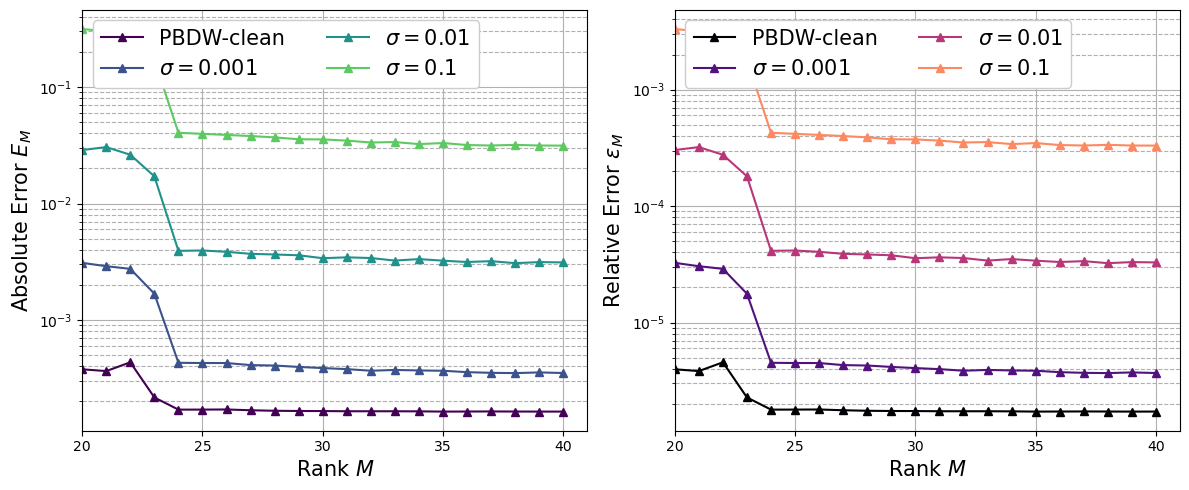

In [6]:
noisy_PBDW_AbsErr = dict()
noisy_PBDW_RelErr = dict()

field = 'T'
sigma = ['0.001', '0.01', '0.1']

# Importing data
for ll in range(len(sigma)):
    noisy_PBDW_AbsErr['sigma = '+sigma[ll]] = np.loadtxt('./NoisyData-noreg/PBDW_'+field+'_WeakGreedy_s_'+s2[1]+'_sigma_'+sigma[ll]+'/'+field+'_PBDW_Online_files/average_L2_absolute_error.txt')
    noisy_PBDW_RelErr['sigma = '+sigma[ll]] = np.loadtxt('./NoisyData-noreg/PBDW_'+field+'_WeakGreedy_s_'+s2[1]+'_sigma_'+sigma[ll]+'/'+field+'_PBDW_Online_files/average_L2_relative_error.txt')

noisyPBDWTestErr_fig = plt.figure( figsize= (12,5))

color = iter(cm.viridis(np.linspace(0, 1, len(sigma)+2)))
plt.subplot(1,2,1)
c = next(color)
plt.semilogy(np.arange(20,clean_scalar_AbsErr['PBDW'].size+20,1),
        clean_scalar_AbsErr['PBDW'], '-^', c=c, label=r"PBDW-clean")
for ll in range(len(sigma)):
    c = next(color)
    plt.semilogy(np.arange(20,noisy_PBDW_AbsErr['sigma = '+sigma[ll]].size+20,1),
            noisy_PBDW_AbsErr['sigma = '+sigma[ll]], '-^', c=c, label=r"$\sigma = "+sigma[ll]+"$")

plt.xlabel(r"Rank $M$",fontsize=15)
plt.xticks(np.arange(20,noisy_PBDW_AbsErr['sigma = '+sigma[ll]].size+20,5))
plt.xlim(20,noisy_PBDW_AbsErr['sigma = '+sigma[ll]].size+20)
plt.ylabel(r"Absolute Error $E_M$",fontsize=15)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle='--')
plt.legend(fontsize=15, framealpha=1., loc = 'upper left', ncols=2)


color = iter(cm.magma(np.linspace(0, 1, len(sigma)+2)))
plt.subplot(1,2,2)
c = next(color)
plt.semilogy(np.arange(20,clean_scalar_RelErr['PBDW'].size+20,1),
        clean_scalar_RelErr['PBDW'], '-^', c=c, label=r"PBDW-clean")
for ll in range(len(sigma)):
    c = next(color)
    plt.semilogy(np.arange(20,noisy_PBDW_RelErr['sigma = '+sigma[ll]].size+20,1),
            noisy_PBDW_RelErr['sigma = '+sigma[ll]], '-^', c=c, label=r"$\sigma = "+sigma[ll]+"$")

plt.xlabel(r"Rank $M$",fontsize=15)
plt.xticks(np.arange(20,noisy_PBDW_RelErr['sigma = '+sigma[ll]].size+20,5))
plt.xlim(20,noisy_PBDW_RelErr['sigma = '+sigma[ll]].size+20)
plt.ylabel(r"Relative Error $\varepsilon_M$",fontsize=15)
plt.grid(which='major',linestyle='-')
plt.grid(which='minor',linestyle='--')
plt.legend(fontsize=15, framealpha=1., loc = 'upper left', ncols=2)

plt.tight_layout()
# noisyGEIMTestErr_fig.savefig('GEIMnoisy_test_error.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Regularisation via TR-GEIM for noisy data
In order to retrieve robustness and stability, the Tikhonov regularisation is used. Only the case with $s^2=0.0004$ and $\sigma = 0.01$ are going to be plotted.

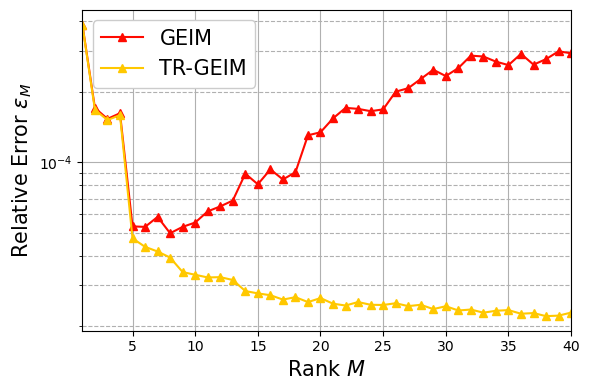

In [7]:
noisy_TRGEIM_RelErr = dict()

field = 'T'
sigma = ['0.01']

# Importing data
for ll in range(len(sigma)):
    noisy_TRGEIM_RelErr['sigma = '+sigma[ll]] = np.loadtxt('./NoisyData-reg/GEIM_'+field+'_s_'+s2[1]+'/'+field+'_TR-GEIM_files/average_L2_relative_error_noiseStd_'+sigma[ll]+'.txt')[1:]
                                                                                   
noisyTRGEIMTestErr_fig = plt.figure( figsize= (6 * len(sigma),4))

for ll in range(len(sigma)):
    plt.subplot(1,len(sigma),ll+1)
    
    plt.semilogy(np.arange(1,noisy_GEIM_RelErr['sigma = '+sigma[ll]].size+1,1),
                 noisy_GEIM_RelErr['sigma = '+sigma[ll]], '-^', c=cm.autumn(10), label=r"GEIM")
    plt.semilogy(np.arange(1,noisy_TRGEIM_RelErr['sigma = '+sigma[ll]].size+1,1),
                 noisy_TRGEIM_RelErr['sigma = '+sigma[ll]], '-^', c=cm.autumn(200), label=r"TR-GEIM")
         
    plt.xlabel(r"Rank $M$",fontsize=15)
    plt.xticks(np.arange(0,noisy_TRGEIM_RelErr['sigma = '+sigma[ll]].size+1,5))
    plt.xlim(1,noisy_TRGEIM_RelErr['sigma = '+sigma[ll]].size)
    plt.ylabel(r"Relative Error $\varepsilon_M$",fontsize=15)
    plt.grid(which='major',linestyle='-')
    plt.grid(which='minor',linestyle='--')
    plt.legend(fontsize=15, framealpha=1., loc = 'upper left', ncols=1)

plt.tight_layout()
# noisyTRGEIMTestErr_fig.savefig('TRGEIMnoisy_test_error.pdf', format='pdf', dpi=300, bbox_inches='tight')

## Indirect Reconstruction with GEIM-VT
In this section, we are going to plot the average relative error between the interpolant of GEIM-VT with clean data per each field that has been reconstructed ($T, p_{rgh}$ and $\mathbf{u}$) and the true fields of the Test set, defined as follows for the generic field $\psi$ (either scalar or vector)
\begin{equation*}
\varepsilon_M = \left\langle \frac{\left\| \psi(\boldsymbol{\mu}) - \mathcal{I}_M[\psi(\boldsymbol{\mu})]\right\|_{L^2}}{\left\| \psi(\boldsymbol{\mu}) \right\|_{L^2}}\right\rangle_{\boldsymbol{\mu}\in\Xi_{\text{test}}} 
\end{equation*}
given $\mathcal{I}_M$ the interpolant using $M$ basis functions.

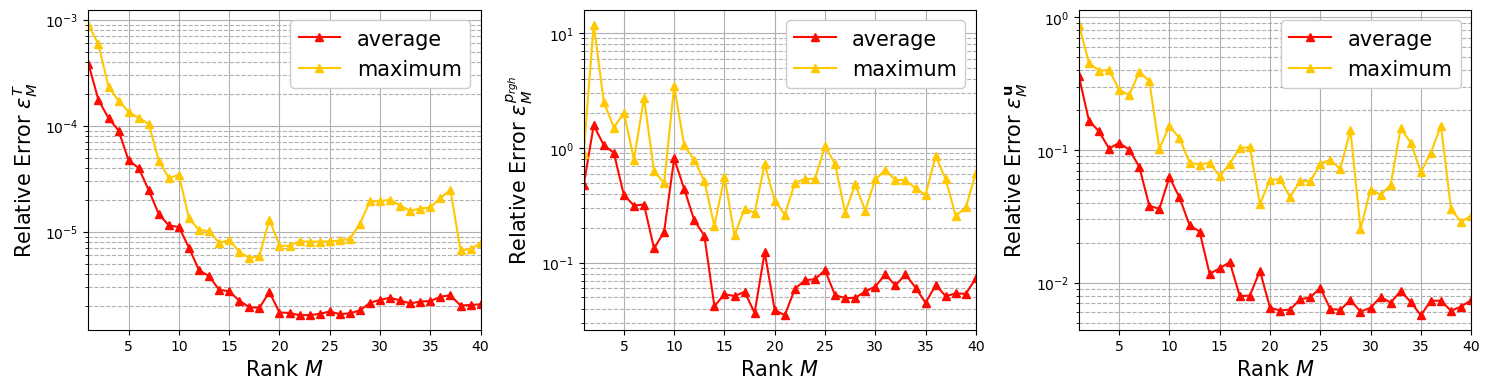

In [7]:
clean_GEIM_VT_aveErr = dict()
clean_GEIM_VT_maxErr = dict()

fields = ['T', 'p_rgh', 'U']
field_tex = ['T', 'p_{rgh}', '\mathbf{u}']
s2 = '0.0004'

# Importing data
for ll in range(len(fields)):
    clean_GEIM_VT_aveErr[fields[ll]] = np.loadtxt('./GEIM-VT_s_'+s2+'/GEIM-VT_Online_files/'+fields[ll]+'_average_L2_relative_error.txt')[1:]
    clean_GEIM_VT_maxErr[fields[ll]] = np.loadtxt('./GEIM-VT_s_'+s2+'/GEIM-VT_Online_files/'+fields[ll]+'_maximum_L2_relative_error.txt')[1:]
                                                                                   
cleanGEIM_VT_TestErr_fig = plt.figure( figsize= (5 * len(fields),4))

for ll in range(len(fields)):
    plt.subplot(1,len(fields),ll+1)
    
    plt.semilogy(np.arange(1,clean_GEIM_VT_aveErr[fields[ll]].size+1,1),
                 clean_GEIM_VT_aveErr[fields[ll]], '-^', c=cm.autumn(10), label=r"average")
    plt.semilogy(np.arange(1,clean_GEIM_VT_maxErr[fields[ll]].size+1,1),
                 clean_GEIM_VT_maxErr[fields[ll]], '-^', c=cm.autumn(200), label=r"maximum")
         
    plt.xlabel(r"Rank $M$",fontsize=15)
    plt.xticks(np.arange(0,clean_GEIM_VT_maxErr[fields[ll]].size+1,5))
    plt.xlim(1,clean_GEIM_VT_maxErr[fields[ll]].size)
    plt.ylabel(r"Relative Error $\varepsilon_M^{"+field_tex[ll]+"}$",fontsize=15)
    plt.grid(which='major',linestyle='-')
    plt.grid(which='minor',linestyle='--')
    plt.legend(fontsize=15, framealpha=1., loc = 'upper right', ncols=1)

plt.tight_layout()
# cleanGEIM_VT_TestErr_fig.savefig('GEIMVTclean_test_error.pdf', format='pdf', dpi=300, bbox_inches='tight')